In [ ]:
pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.3 MB/s eta 0:00:00



0: 480x640 3 persons, 4 handbags, 1 suitcase, 434.0ms
Speed: 4.0ms preprocess, 434.0ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


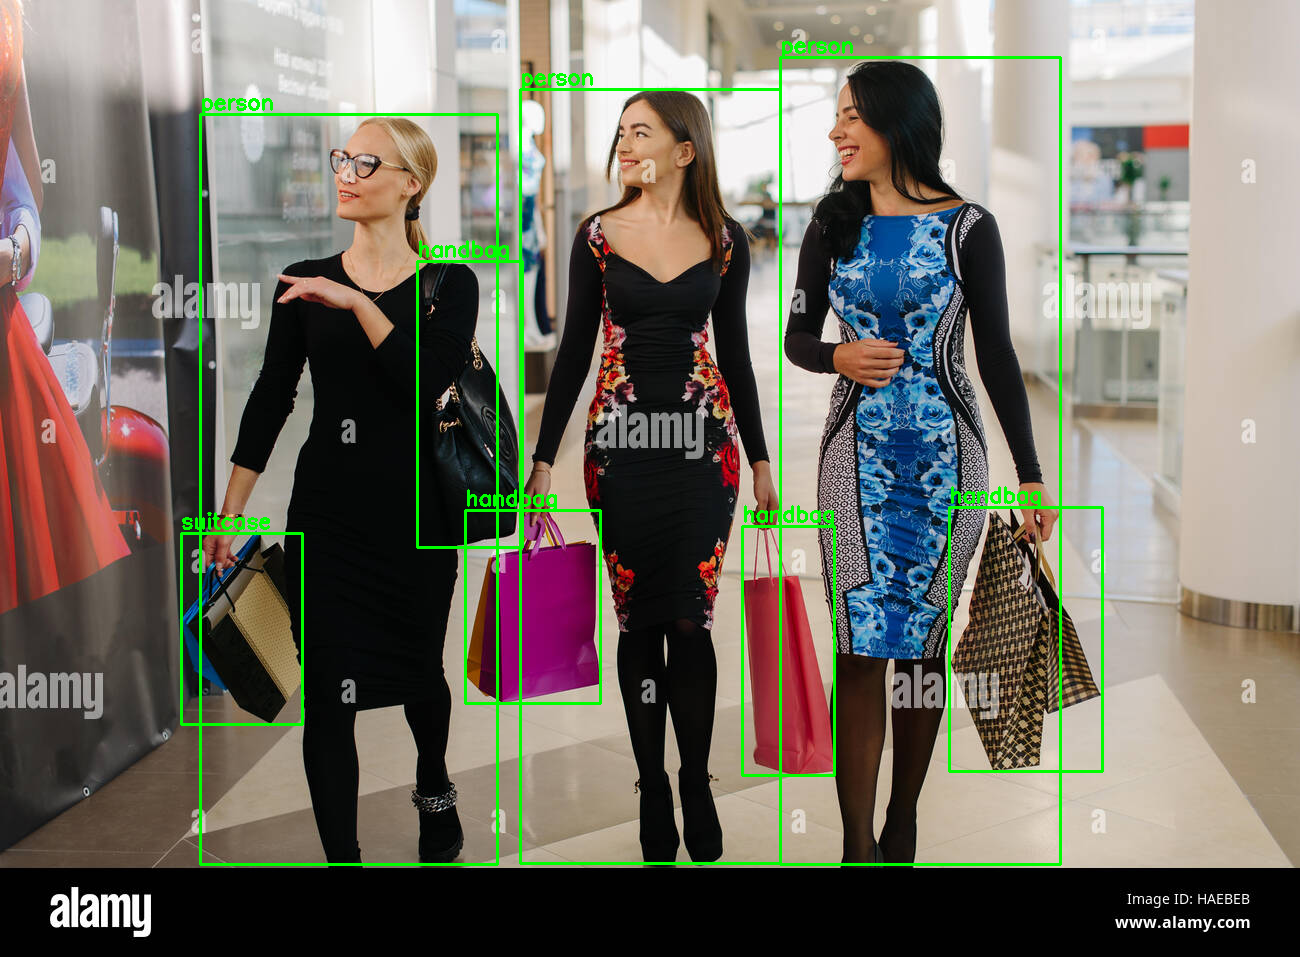

⚠ ALERT: Person or bag detected!


In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load YOLO model
model = YOLO("yolov8s.pt")

# Load image (FIXED: cv2 not cvcv)
img = cv2.imread("/content/three-attractive-women-have-shopping-in-big-mall-female-wearing-dresses-HAEBEB.jpg")

# Run detection
results = model(img)[0]

alert = False

for box in results.boxes:
    cls = int(box.cls[0])
    label = results.names[cls]

    # If YOLO detects person or bag → alert
    if label in ["person", "backpack", "handbag"]:
        alert = True

    # Draw box
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0,255,0), 2)

# Show result
cv2_imshow(img)

# Print alert
if alert:
    print("⚠ ALERT: Person or bag detected!")
else:
    print("No threat detected.")